In [48]:
import matplotlib.pyplot as plt
import numpy as np
from utils import gen_markov_simple

In [49]:
pi_X, Xt, P_true = gen_markov_simple(number_states=5, T=1000)
Xt

array([1, 0, 4, 4, 4, 2, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 4, 4, 2,
       1, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 2, 0, 3, 3, 0, 1, 3, 3, 4, 4, 0,
       0, 3, 2, 4, 1, 3, 0, 1, 0, 1, 2, 2, 0, 0, 1, 4, 1, 0, 2, 4, 4, 2,
       1, 0, 0, 2, 0, 0, 1, 3, 4, 0, 1, 3, 3, 1, 1, 2, 2, 0, 1, 3, 0, 2,
       1, 3, 1, 1, 1, 1, 0, 1, 3, 1, 0, 0, 1, 1, 1, 3, 3, 0, 2, 2, 1, 1,
       3, 4, 4, 0, 4, 0, 1, 3, 4, 2, 0, 4, 0, 3, 3, 4, 0, 3, 4, 0, 0, 2,
       1, 1, 0, 0, 0, 2, 4, 3, 4, 4, 4, 0, 4, 4, 2, 1, 2, 1, 1, 1, 3, 4,
       4, 4, 2, 4, 1, 2, 1, 1, 0, 3, 1, 3, 1, 3, 1, 1, 0, 0, 0, 2, 4, 4,
       4, 1, 1, 0, 2, 0, 1, 1, 3, 0, 4, 0, 4, 0, 0, 0, 1, 3, 0, 2, 4, 0,
       1, 3, 3, 4, 4, 4, 0, 2, 1, 1, 1, 1, 3, 4, 0, 0, 3, 1, 3, 3, 4, 4,
       4, 0, 4, 1, 3, 4, 4, 4, 0, 2, 4, 0, 0, 1, 3, 1, 1, 1, 3, 4, 0, 3,
       2, 0, 4, 3, 0, 1, 1, 1, 3, 4, 4, 1, 1, 0, 1, 1, 1, 2, 4, 4, 4, 0,
       3, 0, 0, 4, 0, 4, 0, 2, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 0, 1, 3,
       1, 1, 2, 1, 1, 0, 4, 1, 2, 0, 0, 3, 1, 2, 0,

Text(0, 0.5, 'next state')

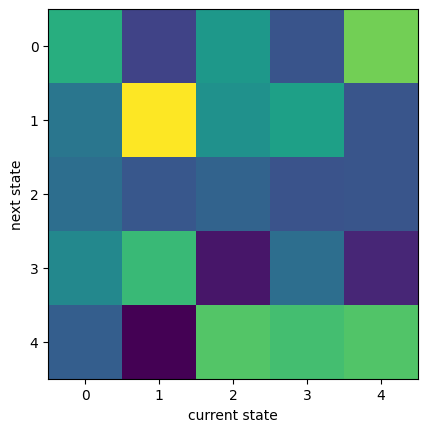

In [50]:
plt.imshow(P_true)
plt.xlabel("current state")
plt.ylabel("next state")

Text(0, 0.5, 'state')

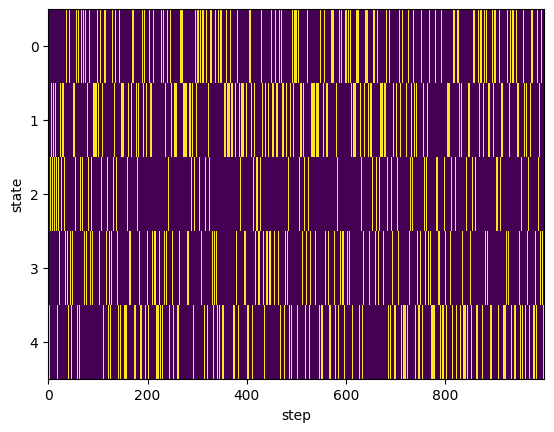

In [51]:
plt.imshow(pi_X, aspect="auto", interpolation="none")
plt.xlabel("step")
plt.ylabel("state")

In [52]:
def calculate_P(number_of_states, Xt):
    P = np.zeros((number_of_states, number_of_states))  

    for t in range(0, len(Xt) - 1):
        i = Xt[t]
        j = Xt[t + 1]
        P[j,i] += 1  # ZUstand i wechselt in Zustand j

    
    spaltensummen = P.sum(axis=0, keepdims=True)
    spaltensummen[spaltensummen == 0] = 1
    P = P / spaltensummen
    return P

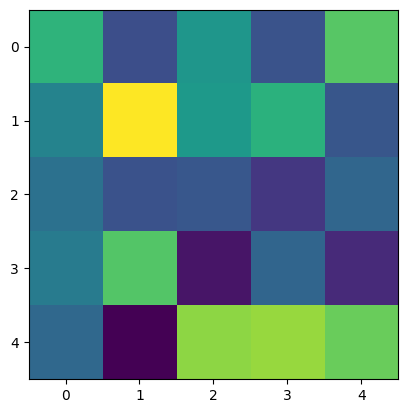

In [53]:
P = calculate_P(number_of_states=5, Xt=Xt)
plt.imshow(P)

How does the length of the time serie affect our estimation?

In [54]:
Ts = [10,25,50,75,100,500,1000,1500,5000,10000, 50000]
n_reps = 10

errs = np.zeros((n_reps, len(Ts)))

for rep in range(n_reps):
    for t_idx, T in enumerate(Ts):
        pi_X, Xt, P_true = gen_markov_simple(number_states=5, T=T)
        est_P = calculate_P(number_of_states=5, Xt=Xt)
        error = np.linalg.norm(est_P - P_true)
        errs[rep, t_idx] = error

Plot the error vs the number of observations

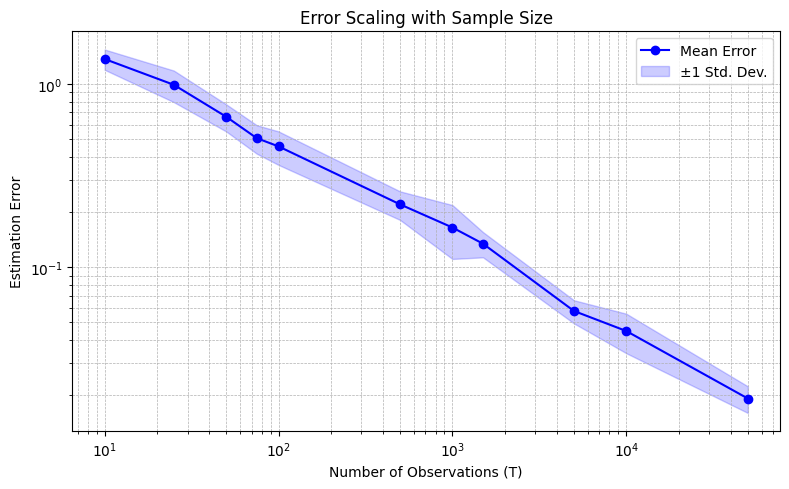

In [55]:
# use plt.fill_between

mean_errs = np.mean(errs, axis=0)
std_errs = np.std(errs, axis=0)

plt.figure(figsize=(8, 5))
plt.plot(Ts, mean_errs, label='Mean Error', color='blue', marker='o')
plt.fill_between(Ts, mean_errs - std_errs, mean_errs + std_errs,
                 color='blue', alpha=0.2, label='±1 Std. Dev.')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Observations (T)')
plt.ylabel('Estimation Error')
plt.title('Error Scaling with Sample Size')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

## Mean exit time
The mean exit time $t_i^e$ from state $i$, for a given transition matrix $P$ is given by:
$$t_i^e=\frac{1}{1-P_{i,i}}$$
and it represents the mean number of steps that will take to exit from state $i$, once entered

In [56]:
def mean_exit_time(P):
    print(np.diag(P))
    print(1/(1-np.diag(P)))
    return 1/(1-np.diag(P))
    
mean_exit_time(P)

[0.28971963 0.44029851 0.125      0.14792899 0.34090909]
[1.40789474 1.78666667 1.14285714 1.17361111 1.51724138]


array([1.40789474, 1.78666667, 1.14285714, 1.17361111, 1.51724138])

## Examples
Consider the following transition matrices, and answer the following questions:

- What kind of system do we have?
- What behaviour should be expected?
- How does `Xt` look like?
- What is the mean exit time for each state?

### Example a

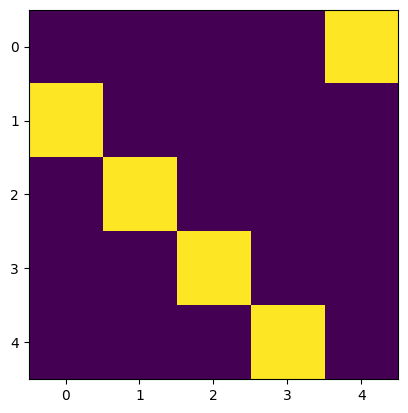

In [57]:
Pa = np.roll(np.identity(5),1,axis=0)
plt.imshow(Pa)

In [58]:
mean_exit_time(Pa)

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]


array([1., 1., 1., 1., 1.])

Text(0, 0.5, 'state')

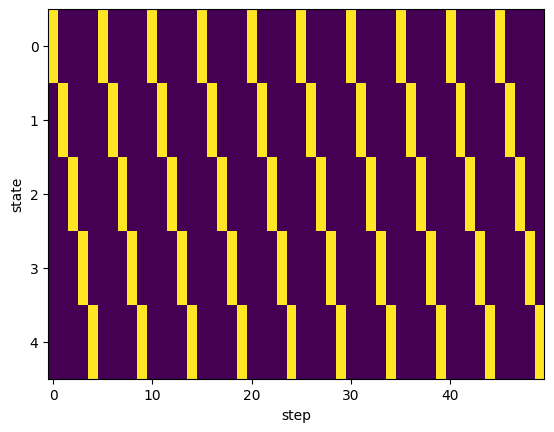

In [59]:
pi_X_a, _, _ = gen_markov_simple(number_states=5, T=50, P_true=Pa)
plt.imshow(pi_X_a, aspect="auto", interpolation="none")
plt.xlabel("step")
plt.ylabel("state")

### Example b

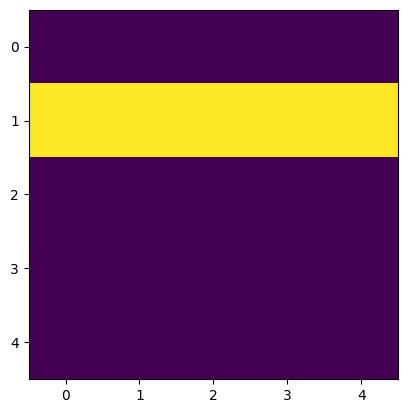

In [60]:
Pb = np.zeros((5,5))
Pb[1,:] = 1
plt.imshow(Pb)

In [61]:
mean_exit_time(Pb)

[0. 1. 0. 0. 0.]
[ 1. inf  1.  1.  1.]


C:\Users\User\AppData\Local\Temp\ipykernel_14436\3168926101.py:3: RuntimeWarning: divide by zero encountered in divide
  print(1/(1-np.diag(P)))
C:\Users\User\AppData\Local\Temp\ipykernel_14436\3168926101.py:4: RuntimeWarning: divide by zero encountered in divide
  return 1/(1-np.diag(P))


array([ 1., inf,  1.,  1.,  1.])

Text(0, 0.5, 'state')

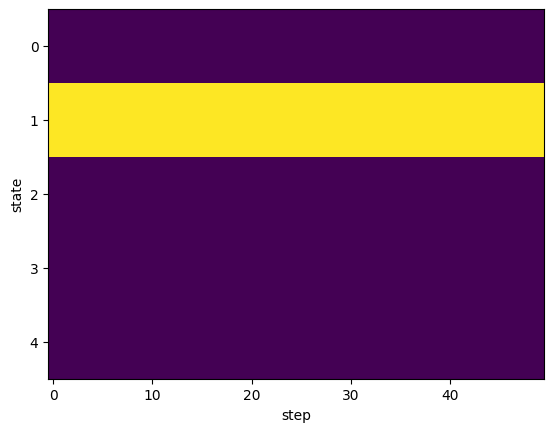

In [62]:
pi_X_b, _, _ = gen_markov_simple(number_states=5, T=50, P_true=Pb)
plt.imshow(pi_X_b, aspect="auto", interpolation="none")
plt.xlabel("step")
plt.ylabel("state")

### Example c

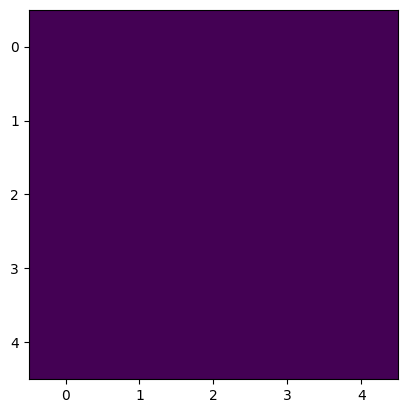

In [63]:
Pc = 1/5 * np.ones((5,5))
plt.imshow(Pc)

In [64]:
mean_exit_time(Pc)

[0.2 0.2 0.2 0.2 0.2]
[1.25 1.25 1.25 1.25 1.25]


array([1.25, 1.25, 1.25, 1.25, 1.25])

Text(0, 0.5, 'state')

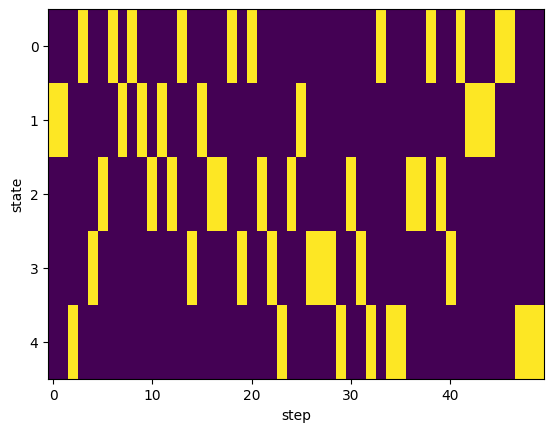

In [65]:
pi_X_c, _, _ = gen_markov_simple(number_states=5, T=50, P_true=Pc)
plt.imshow(pi_X_c, aspect="auto", interpolation="none")
plt.xlabel("step")
plt.ylabel("state")

### Example d

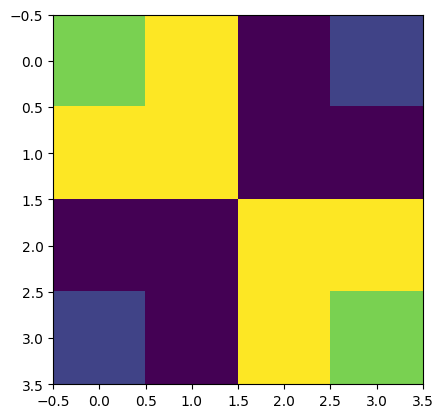

In [66]:
eps = 1e-1
Pd = np.array(
        [
            [.5-eps, .5, 0., 0+eps],
            [.5,     .5, 0., 0.],
            [0.,     0., .5, .5],
            [0+eps,  0,.5,.5-eps]
        ]
    )
plt.imshow(Pd)

Text(0, 0.5, 'state')

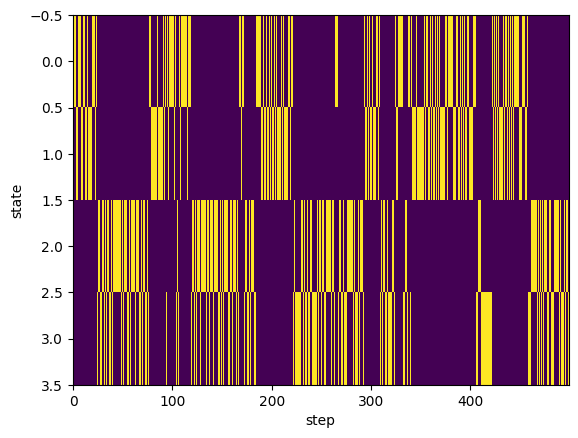

In [67]:
pi_X_d, _, _ = gen_markov_simple(number_states=4, T=500, P_true=Pd)
plt.imshow(pi_X_d, aspect="auto", interpolation="none")
plt.xlabel("step")
plt.ylabel("state")